In [312]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

##CÂU 1: Tạo dataframe. Xuất 10 samples bất kỳ. Đếm số lượng sample và feature


In [313]:
df=pd.read_csv('http://gitlab.com/uitgit/datasets/-/raw/master/LAB2022_V2.csv')

In [314]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,5095600310,20140725T000000,379500.0,3.0,2.25,2070.0,14196.0,2.0,0,0,...,7,2070.0,0,1989,0,98059.0,47.4617,-122.070,1550,13860
1,1858600012,20140605T000000,310000.0,4.0,2.25,2192.0,12128.0,2.0,0,0,...,8,2192.0,0,2006,0,98030.0,47.3644,-122.200,1914,4649
2,1023079147,20140820T000000,652500.0,4.0,2.25,2220.0,130244.0,2.0,0,0,...,8,2220.0,0,1989,0,98027.0,47.4989,-121.900,2680,130680
3,8658303080,20141223T000000,312000.0,2.0,1.00,1160.0,7500.0,1.5,0,0,...,7,NaN,0,1916,0,98014.0,47.6499,-121.916,1110,7500
4,826000295,20141215T000000,379950.0,2.0,1.00,870.0,7500.0,1.0,0,0,...,7,870.0,0,1947,0,98136.0,47.5465,-122.384,1240,5709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20118,7140700850,20150326T000000,350000.0,4.0,2.50,2560.0,5428.0,2.0,0,0,...,8,2560.0,0,2012,0,98042.0,47.3835,-122.095,2620,5428
20119,7853220330,20141006T000000,730000.0,4.0,3.50,4420.0,7902.0,2.0,0,0,...,10,3350.0,1070,2004,0,98065.0,47.5327,-121.860,3440,7851
20120,2968800626,20140822T000000,355000.0,4.0,2.00,1770.0,8890.0,1.0,0,0,...,6,NaN,0,1949,0,98166.0,47.4589,-122.353,1010,7620
20121,2026079055,20140818T000000,380000.0,1.0,1.50,1200.0,44866.0,1.5,0,0,...,7,1200.0,0,1983,0,98019.0,47.7205,-121.930,1480,67082


In [315]:
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1765,4022905473,20141205T000000,565000.0,5.0,3.00,2560.0,12480.0,1.0,0,0,...,8,1590.0,970,2012,0,98155.0,47.7657,-122.284,2500,17299
9304,2425700005,20150428T000000,760000.0,3.0,1.75,1410.0,15120.0,1.0,0,0,...,7,1410.0,0,1950,0,98004.0,47.5974,-122.195,1880,15120
19876,6431000749,20140922T000000,349000.0,3.0,3.25,1340.0,1151.0,3.0,0,0,...,7,1340.0,0,2008,0,98103.0,47.6904,-122.346,1290,1200
15036,8651402750,20150430T000000,219950.0,3.0,1.50,1210.0,5200.0,1.0,0,0,...,6,1210.0,0,1969,0,98042.0,47.3615,-122.087,1120,5200
17661,3903200050,20150324T000000,263950.0,3.0,1.75,1700.0,11613.0,1.0,0,0,...,7,1180.0,520,1977,0,98092.0,47.2874,-122.187,1500,12377
19748,6181430800,20150105T000000,330000.0,4.0,2.50,3504.0,6000.0,2.0,0,0,...,7,3504.0,0,2006,0,98001.0,47.3012,-122.285,2790,5231
10612,3876000910,20150129T000000,487000.0,4.0,2.25,2400.0,7000.0,1.0,0,0,...,8,1800.0,600,1965,0,98034.0,47.7207,-122.184,2210,7210
15017,7577700521,20141001T000000,539000.0,2.0,1.75,1900.0,5175.0,1.0,0,0,...,7,1200.0,700,1919,0,98116.0,47.5689,-122.386,1370,5175
7627,7129303070,20140820T000000,735000.0,4.0,2.75,3040.0,2415.0,2.0,1,4,...,8,3040.0,0,1966,0,98118.0,47.5188,-122.256,2620,2433
10783,5249803645,20140829T000000,452000.0,2.0,1.00,1220.0,6000.0,1.0,0,0,...,6,880.0,340,1938,0,98118.0,47.5647,-122.270,1220,6840


In [316]:
df.shape

(20123, 21)

NX: Bộ dữ liệu trên có 20123 sample và 21 feature.

##CÂU 2: Trả về số lượng bị khuyết của từng cột.

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20123 entries, 0 to 20122
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20123 non-null  int64  
 1   date           20123 non-null  object 
 2   price          20119 non-null  float64
 3   bedrooms       20111 non-null  float64
 4   bathrooms      20114 non-null  float64
 5   sqft_living    20120 non-null  float64
 6   sqft_lot       20121 non-null  float64
 7   floors         20123 non-null  float64
 8   waterfront     20123 non-null  int64  
 9   view           20123 non-null  int64  
 10  condition      20122 non-null  float64
 11  grade          20123 non-null  int64  
 12  sqft_above     20118 non-null  float64
 13  sqft_basement  20123 non-null  int64  
 14  yr_built       20123 non-null  int64  
 15  yr_renovated   20123 non-null  int64  
 16  zipcode        20122 non-null  float64
 17  lat            20123 non-null  float64
 18  long  

In [318]:
df.isnull().sum()

id                0
date              0
price             4
bedrooms         12
bathrooms         9
sqft_living       3
sqft_lot          2
floors            0
waterfront        0
view              0
condition         1
grade             0
sqft_above        5
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           1
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

##CÂU 3: Xử lý các giá trị bị khuyết theo yêu cầu.

In [319]:
df['bedrooms'].fillna(df['bedrooms'].mean(),inplace=True)

In [320]:
df['sqft_basement'].fillna(df['sqft_basement'].median(),inplace=True)

In [321]:
import random

In [322]:
df['view'].fillna(random.choice(df['view']),inplace=True)

In [323]:
df['bathrooms'].fillna(df['bathrooms'].mean(),inplace=True)

In [324]:
df['sqft_lot'].fillna(df['sqft_lot'].mode(),inplace=True)

In [325]:
df['price'].fillna(df['price'].median(),inplace=True)

In [326]:
df['condition'].fillna( df['condition'].mean(),inplace=True)

In [327]:
df['sqft_above'].fillna( df['sqft_above'].mean(),inplace=True)

In [328]:
df['zipcode'].fillna(df['zipcode'].mean(),inplace=True)

In [329]:
df['sqft_living'].fillna(df['sqft_living'].median(),inplace=True)

In [330]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         2
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

NX: Dùng mode() không giải quyết được hết giá trị NaN.

##CÂU 4: Chuyển đơn vị Foot sang m2

In [331]:
df['sqft_living']

0        2070.0
1        2192.0
2        2220.0
3        1160.0
4         870.0
          ...  
20118    2560.0
20119    4420.0
20120    1770.0
20121    1200.0
20122    1080.0
Name: sqft_living, Length: 20123, dtype: float64

In [332]:
df['sqft_living']=df['sqft_living']*0.092903
df['sqft_lot']=df['sqft_lot']*0.092903
df['sqft_above']=df['sqft_above']*0.092903
df['sqft_basement']=df['sqft_basement']*0.092903
df['sqft_living15']=df['sqft_living15']*0.092903
df['sqft_lot15']=df['sqft_lot15']*0.092903

In [333]:
df['sqft_living']

0        192.309210
1        203.643376
2        206.244660
3        107.767480
4         80.825610
            ...    
20118    237.831680
20119    410.631260
20120    164.438310
20121    111.483600
20122    100.335240
Name: sqft_living, Length: 20123, dtype: float64

##CÂU 5: Đếm các giá trị duy nhất trong cột Floors. Tạo một DataFrame từ đó, trực quan kết quả thu được và nhận xét.

In [334]:
count_floors=df['floors'].value_counts()

In [335]:
df_floors=pd.DataFrame(count_floors)

In [336]:
df_floors

,floors
1.0,9951
2.0,7675
1.5,1772
3.0,566
2.5,153
3.5,6


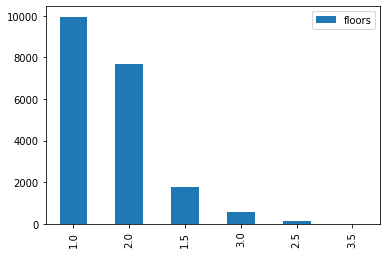

In [337]:
df_floors.plot(kind='bar')

NX: 
Từ biểu đồ ta có thể nhìn thấy rằng có sự không cân bằng về mặt, có thể thấy phần lớn chỉ tập trung vào floors=1 và floors=2 chiếm hơn một nửa giá trị còn floors=3, floors=2.5, floors=3.5 chỉ chiếm một lượng nhỏ.

#CÂu 6: Trực quan cột waterfront bằng boxplot theo price. Bình luận

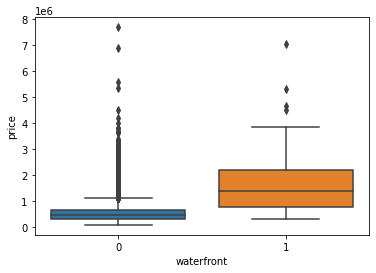

In [338]:
sns.boxplot(x=df['waterfront'], y=df['price'])

NX: 
- Có sự mất cân bằng về mặt dữ liệu.
- Nhìn qua thì có thể thấy sự chênh lệch giữa nhà có view ra bờ sông và nhà không có view ra bờ sông nhưng lại có một số trường hợp ở các nhà không có view ra bờ sông có giá lại ngang so với các nhà có view bờ sông
=> Chưa chắc chắn view ra bờ sông có thực sự ảnh hưởng đến giá nhà, cần dùng thêm nhiều phương pháp để xác minh. 

##CÂU 7: Sử dụng regplot để đánh giá thử các ảnh hưởng của cocojt các loại diện tích so với giá. Phác họa một hình sau đó nhận xét.

In [339]:
feature_sqft_ =[] 
for i in df.columns: 
  if 'sqft_' in i: 
    feature_sqft_.append(i) 

In [340]:
feature_sqft_

['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15']

In [341]:
import matplotlib.pyplot as plt


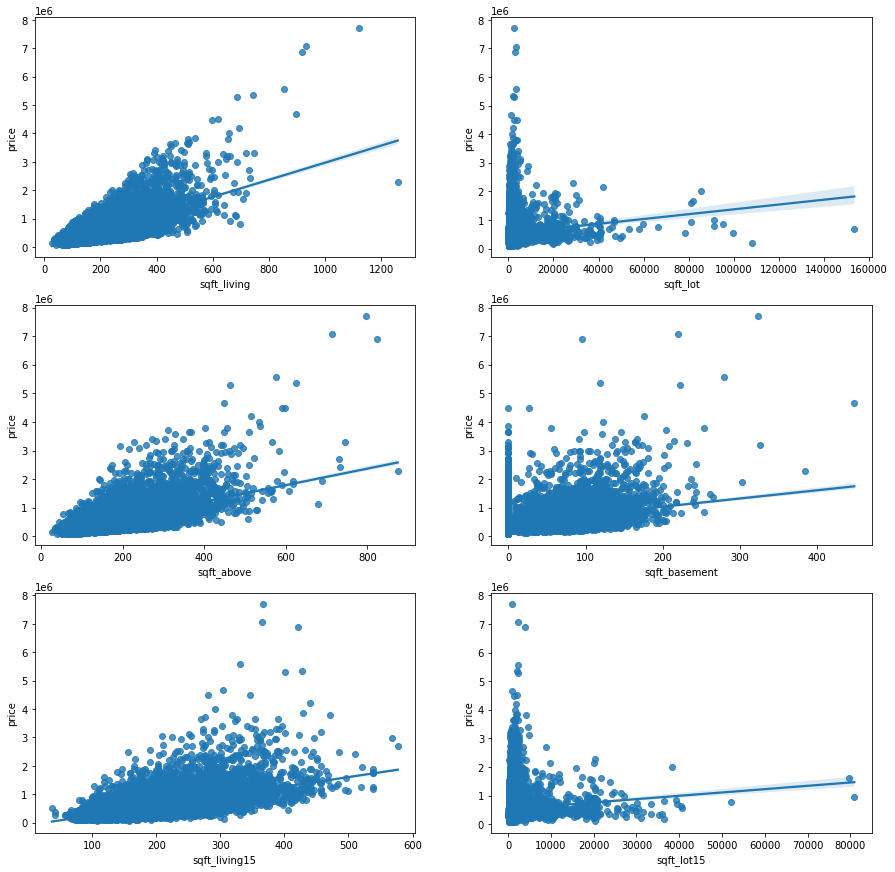

In [342]:
fig=plt.figure(figsize=(15,15)) 
count=1 
for i in feature_sqft_: 
  fig.add_subplot(3,2,count) 
  sns.regplot(x=df[i], y=df['price']) 
  count+=1 
plt.show()

NX:
- Từ biểu đồ ta có thể thấy ba thuộc tính sqft_lot, sqft_lot15, sqft_basement không có quan hệ tuyến tính mạnh với giá -> chúng không ảnh hưởng nhiều đến giá nhà.
- Ba thuộc tính còn lại đều có quan hệ tuyến tính tương đối với giá nhà -> chúng có ảnh hưởng với giá nhà, không mạnh nhưng cũng không yếu.

##CÂU 8: Với các cột theo đề bài hãy tìm ra một mô hình duy nhất ( sử dụng pipeline)

In [343]:
x8= df[['floors','view','waterfront','bedrooms','grade','bathrooms','sqft_living15','sqft_above','sqft_living','sqft_basement']]
y=df['price']

In [344]:
input = [('Scale',StandardScaler()), 
         ('polynomial', PolynomialFeatures()), 
         ('model', LinearRegression()) ]

In [345]:
pipe= Pipeline(input)

In [346]:
pipe.fit(x8,y)

Pipeline(steps=[('Scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [347]:
pipe.score(x8,y)

0.6783344960028546

In [348]:
y_pred=pipe.predict(x8)

In [349]:
mean_squared_error(y_pred,y)

43310683941.985115

In [350]:
r2_score(y_pred,y)

0.5258050116697612

##CÂU 9: Chọn tổ hợp 6 biến cho là quan trọng nhất để phát triển mô hình.


In [351]:
x9=df[['view', 'grade', 'bedrooms', 'sqft_living15', 'sqft_above', 'sqft_living']]

In [352]:
input = [('Scale',StandardScaler()), 
         ('polynomial', PolynomialFeatures(degree=3)), 
         ('model', LinearRegression()) ]

In [353]:
pipe= Pipeline(input)

In [354]:
pipe.fit(x9,y)

Pipeline(steps=[('Scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(degree=3)),
                ('model', LinearRegression())])

In [355]:
pipe.score(x9,y)

0.6679689209952493

In [356]:
y_pred2=pipe.predict(x9)

In [357]:
r2_score(y_pred2,y)

0.5029243598488975